#Machine Learning I - Fase 1 - Template


Nome: **RODRIGO SANTANA LOPES**

##Análise Exploratória e Preparação dos Dados


Nesta fase, você se apropriará dos dados, conhecendo o dataset. Será nesta fase que você fará a etapa de Exploratory Data Analysis, EDA, que consiste em uma análise exploratória dos dados. A partir das técnicas de EDA você descobrirá as características dos dados quanto ao tipo, atributos, escala, frequência, distribuição, dados faltantes etc.

Faz parte dessa etapa também a preparação dos dados, isso inclui a limpeza dos dados, correção, reescala e transformação, bem como a seleção dos atributos mais relevantes para a tarefa de classificação a ser explorada na fase 2.


#1) Formatação dos atributos


Antes de analisar os atributos, precisamos unificar o formato de representação de cada coluna.

Verifique quais colunas estão com mais de uma representação de seu valor e formate para que todos os valores fiquem na mesma representação.

Ex: A coluna “temperature” precisa ser formatada para que todos os valores representem a temperatura em um formato único.

Por fim, você deve transformar todas as colunas para o formato numérico.

**OBS:** Lembre-se que colunas nominais e ordinais possuem formas diferentes de serem transformadas em numéricas.


In [83]:
 # Importei as bibliotecas necessárias para análise e modelagem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# Carreguei o dataset principal e dei o nome de df_principal
df_principal = pd.read_csv(r"C:\Users\LEGION\Desktop\codigos\puc\5 sem\projetos\proj ML\fas1\entrega projeto\AtlanticForestInvertFloInteractionData_2022-07\AtlanticForestInvertFloInteractionData_2022-07.csv")

In [85]:
#entendendo o dataset
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   municipality                                     18422 non-null  object 
 1   state                                            18422 non-null  object 
 2   country                                          18422 non-null  object 
 3   veg_landuse_type_point_level1                    17769 non-null  object 
 4   veg_landuse_type_point_level2                    9278 non-null   object 
 5   veg_landuse_type_buffer5km_level1                15396 non-null  object 
 6   veg_landuse_type_buffer5km_level2                4326 non-null   object 
 7   temperature                                      5829 non-null   object 
 8   temperature_num                                  5829 non-null   float64
 9   temperature_range           

In [86]:
#ANAlisando os tipos de dados de cada coluna isoladamente:
df_principal.dtypes

#Quero entender as variaveis categoricas e numericas 

municipality                                        object
state                                               object
country                                             object
veg_landuse_type_point_level1                       object
veg_landuse_type_point_level2                       object
veg_landuse_type_buffer5km_level1                   object
veg_landuse_type_buffer5km_level2                   object
temperature                                         object
temperature_num                                    float64
temperature_range                                  float64
relative_humidity                                   object
plant_order                                         object
plant_family                                        object
plant_genera                                        object
plant_species_complete_name                         object
plant_type                                          object
plant_habit                                         obje

In [87]:
# Como parte do EDA, usei o describe() para obter estatísticas descritivas das colunas numéricas.
# Estatísticas descritivas do dataset antes de qualquer tratamento
df_principal.describe().round(2) # Arredondei para 2 casas decimais para facilitar a leitura dos valores.
# Analisei contagem, média, desvio padrão, mínimos, máximos e quartis.

,temperature_num,temperature_range,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite
count,5829.00,5829.00,17186.00,9326.00,9187.00
mean,24.36,7.18,10.00,147.68,47.00
std,3.58,4.91,61.57,439.23,147.05
min,7.00,0.00,0.00,1.00,1.00
25%,22.00,0.00,1.00,4.00,1.00
50%,25.00,10.00,1.00,17.00,4.00
75%,25.00,10.00,1.00,50.00,16.00
max,45.50,17.00,2430.00,5100.00,1576.00


In [88]:
#contando os valores
df_principal.dtypes.value_counts()




object     26
float64     5
Name: count, dtype: int64

In [89]:
#Contando valores 
df_principal.dtypes.value_counts()
'''  5 COLUNAS NÚMERICAS

Analisei os tipos de dados e identifiquei 5 colunas numéricas e 26 colunas categóricas ou textuais. Isso mostra que o dataset tem predominância de atributos qualitativos.


'''

'  5 COLUNAS NÚMERICAS\n\nAnalisei os tipos de dados e identifiquei 5 colunas numéricas e 26 colunas categóricas ou textuais. Isso mostra que o dataset tem predominância de atributos qualitativos.\n\n\n'

In [90]:
#QTD de valores nulos por coluna.
df_principal.isnull().sum()

municipality                                           0
state                                                  0
country                                                0
veg_landuse_type_point_level1                        653
veg_landuse_type_point_level2                       9144
veg_landuse_type_buffer5km_level1                   3026
veg_landuse_type_buffer5km_level2                  14096
temperature                                        12593
temperature_num                                    12593
temperature_range                                  12593
relative_humidity                                  16593
plant_order                                          125
plant_family                                         125
plant_genera                                         652
plant_species_complete_name                          167
plant_type                                          3588
plant_habit                                         3870
plant_flower_colour            

In [91]:
#verificando duplicados. Pensando em estatística, valores duplicados podem 
#influenciar nos resultados

df_principal.duplicated().sum()


np.int64(5111)

In [92]:
# Gosto de entender o percentual de nulos da base por coluna.
# Isso ajuda a visualizar quais variáveis podem impactar mais na análise/modelagem.

nulos_por_col_percent = df_principal.isnull().sum() / len(df_principal) * 100

# Exibe as colunas com algum percentual de nulo, ordenadas do maior para o menor
nulos_por_col_percent[nulos_por_col_percent > 0].sort_values(ascending=False).head()



relative_humidity                    90.071653
veg_landuse_type_buffer5km_level2    76.517208
temperature_num                      68.358484
temperature_range                    68.358484
temperature                          68.358484
dtype: float64

In [93]:
# Ajustando a visualização para tomada de decisão sobre tratamento de nulos

tipos_dados = df_principal.dtypes

#mesmo racional que usei no bloco anterior
nulos_por_col = df_principal.isnull().sum()

# Criando um resumo com tipo, quantidade e percentual de nulos
nulos_por_col_percent = (nulos_por_col / len(df_principal)) * 100

resumo_nulos = pd.DataFrame({
    'TIPO DE DADOS': tipos_dados,
    'NULOS': nulos_por_col,
    '% DE NULOS': nulos_por_col_percent
})

# Visualiza as 10 colunas com maior percentual de nulos
resumo_nulos.sort_values(by='% DE NULOS', ascending=False).head(10)

#ainda decidindo o quanto preciso utilizazr de nulos na analise
# As colunas-alvo desta fase (temperature e relative_humidity) apresentam uma quantidade considerável de valores nulos)

,TIPO DE DADOS,NULOS,% DE NULOS
relative_humidity,object,16593,90.071653
veg_landuse_type_buffer5km_level2,object,14096,76.517208
temperature,object,12593,68.358484
temperature_range,float64,12593,68.358484
temperature_num,float64,12593,68.358484
number_of_this_invertebrate_interactions_onsite,float64,9235,50.130279
veg_landuse_type_point_level2,object,9144,49.636304
number_of_this_plant_interactions_onsite,float64,9096,49.375746
invertebrate_collector_structure,object,9028,49.006623
plant_flower_shape,object,5998,32.558897


In [94]:
nulos_por_col_percent[nulos_por_col_percent > 0].sort_values(ascending=False).head()

relative_humidity                    90.071653
veg_landuse_type_buffer5km_level2    76.517208
temperature_num                      68.358484
temperature_range                    68.358484
temperature                          68.358484
dtype: float64

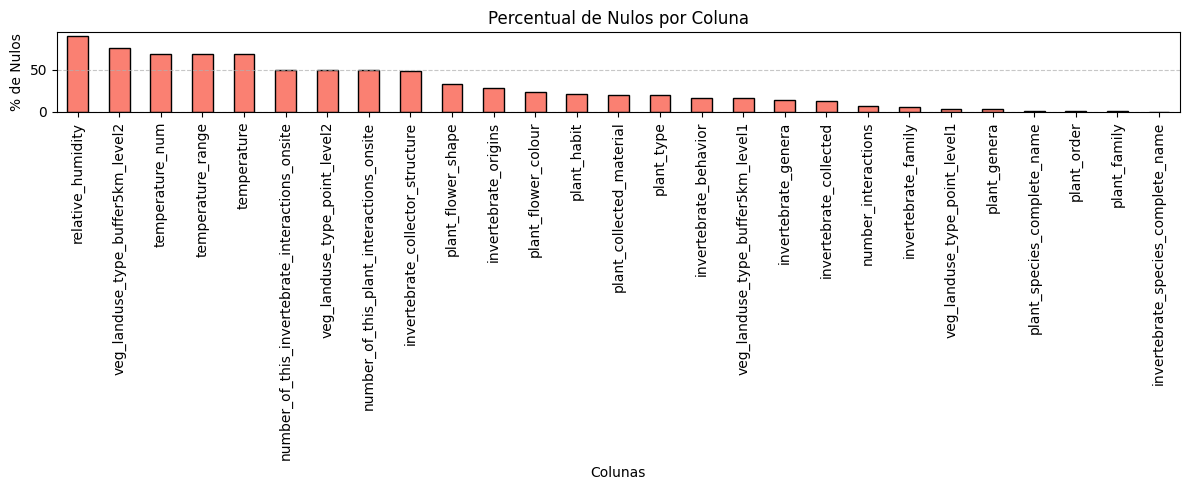

In [95]:
# Visualizando em gráfico de barras o percentual de nulos por coluna (somente colunas com nulos)

nulos_por_col_percent[nulos_por_col_percent > 0].sort_values(ascending=False).plot.bar(
    figsize=(12, 5),
    color='salmon',
    edgecolor='black'
)
plt.title("Percentual de Nulos por Coluna")
plt.ylabel("% de Nulos")
plt.xlabel("Colunas")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [96]:
nulos_por_col_percent[nulos_por_col_percent > 0].sort_values(ascending=False).head(20)

relative_humidity                                  90.071653
veg_landuse_type_buffer5km_level2                  76.517208
temperature_num                                    68.358484
temperature_range                                  68.358484
temperature                                        68.358484
number_of_this_invertebrate_interactions_onsite    50.130279
veg_landuse_type_point_level2                      49.636304
number_of_this_plant_interactions_onsite           49.375746
invertebrate_collector_structure                   49.006623
plant_flower_shape                                 32.558897
invertebrate_origins                               28.704809
plant_flower_colour                                23.743350
plant_habit                                        21.007491
plant_collected_material                           20.290956
plant_type                                         19.476713
invertebrate_behavior                              16.643144
veg_landuse_type_buffer5

In [97]:
#analisando val distinctos 
df_principal.nunique().sort_values(ascending=False)

invertebrate_species_complete_name                 2542
plant_species_complete_name                        1596
plant_genera                                        680
invertebrate_genera                                 626
temperature                                         300
temperature_num                                     292
municipality                                        187
number_interactions                                 168
number_of_this_plant_interactions_onsite            144
plant_family                                        141
relative_humidity                                   140
invertebrate_family                                 136
number_of_this_invertebrate_interactions_onsite     132
plant_flower_colour                                 105
veg_landuse_type_buffer5km_level1                    58
veg_landuse_type_point_level2                        43
plant_flower_shape                                   43
plant_order                                     

Aqui eu quis entender a força e direção das relações lineares entre variáveis contínuas.  

number_of_this_plant_interactions_onsite e number_of_this_invertebrate_interactions_onsite (0.43).

As demais correlações são fracas ou próximas de zero, sugerindo baixa colinearidade entre os demais atributos.


Entendendo as colunas alvos (TARGET) temperature_num | relative_humidity


In [98]:
# Analisando estatísticas descritivas da variável 'temperature_num'
df_principal['temperature_num'].describe().round(2)


count    5829.00
mean       24.36
std         3.58
min         7.00
25%        22.00
50%        25.00
75%        25.00
max        45.50
Name: temperature_num, dtype: float64

A contagem mostra que 5.829 registros possuem valores válidos, ou seja, aproximadamente 31% da base total.

A média da temperatura foi de 24,36°C, com desvio padrão de 3,58°C, ao que tudo indica há uma dispersão moderada dos dados em torno da média.

O valor mínimo encontrado foi de 7°C e o máximo de 45,5°C, sugerindo a presença de outliers ou climas extremos.

O valor mediano (50%) foi 25°C, aparentemente uma distribuição assimétrica à esquerda, já que a mediana está acima da média.

 

 



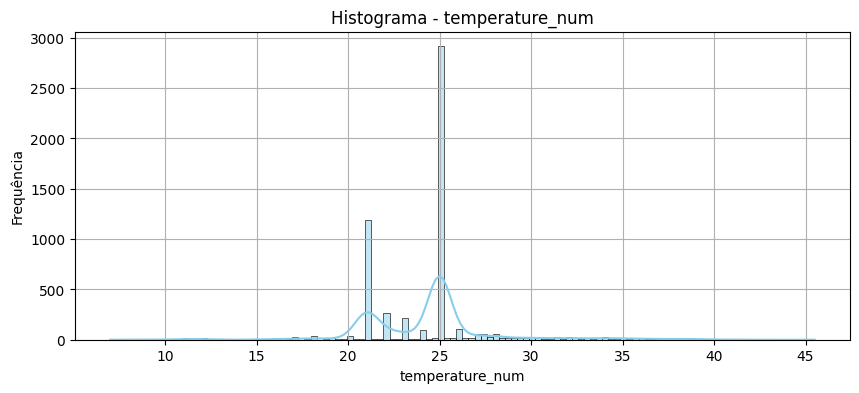

In [99]:
# Plotando histogramas e boxplots isolados para as colunas temperature_num e relative_humidity

# Histograma e Boxplot - temperature_num
plt.figure(figsize=(10, 4))
sns.histplot(df_principal['temperature_num'].dropna(), kde=True, color='skyblue')
plt.title('Histograma - temperature_num')
plt.xlabel('temperature_num')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



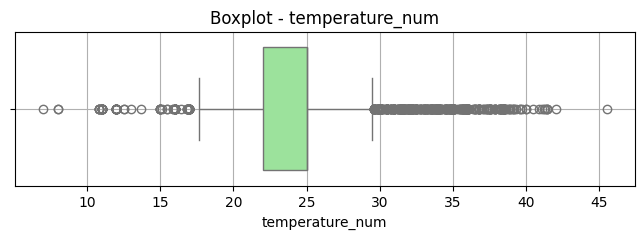

In [100]:

plt.figure(figsize=(8, 2))
sns.boxplot(x=df_principal['temperature_num'], color='lightgreen')
plt.title('Boxplot - temperature_num')
plt.xlabel('temperature_num')
plt.grid(True)
plt.show()

Distribuição: levemente assimétrica à direita (positiva), com concentração entre 22°C e 28°C.

Boxplot: presença de alguns outliers acima de 35°C.

Média: 25,62°C

Mediana: 25°C

Máximo observado: 45,5°C (possível exceção que merece atenção)



In [101]:
df_principal['relative_humidity'].describe().round(2)

count      1829
unique      140
top       50-80
freq       1084
Name: relative_humidity, dtype: object

A coluna relative_humidity possui valores em formato textual, como "50-80", o que explica o tipo object e o alto número de valores únicos (140).

O valor mais comum é "50-80", com 1.084 ocorrências.

Para viabilizar análises numéricas, foi necessário transformar os intervalos em médias, gerando a nova coluna relative_humidity_num.



In [102]:
# Criando uma função para transformar intervalos textuais em médias numéricas.
# Alguns registros vinham como “20–25°C” ou “60–70%”. 
# A função está padronizando esses formatos removendo os símbolos, 
# separando os extremos e calculando a média entre eles.
def intervalo_para_media(valor):
    try:
        if isinstance(valor, str) and '–' in valor:  # se o valor é string e contém um traço de intervalo
            partes = valor.replace('°C','').replace('%','').split('–')  # remove o °C e % e divide o intervalo
            partes = [float(p.strip()) for p in partes]  # converte os extremos para float
            return sum(partes) / 2
        return float(valor)  # Se não for intervalo, tenta converter diretamente para float
    except:
        return None

# Apliquei a função de padronização para as colunas 'temperature' e 'relative_humidity'.
# Com isso, criei novas colunas numéricas ('temperature_num' e 'relative_humidity_num') 
# que pudessem ser usadas nas etapas seguintes do modelo de machine learning.
df_principal['temperature_num'] = df_principal['temperature'].apply(intervalo_para_media)
df_principal['relative_humidity_num'] = df_principal['relative_humidity'].apply(intervalo_para_media)


In [103]:
df_principal['relative_humidity_num'].head().notnull 

<bound method Series.notnull of 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: relative_humidity_num, dtype: float64>

In [104]:
df_principal['temperature_num'].notnull().sum()


np.int64(1710)

In [105]:
df_principal['relative_humidity_num'].notnull().sum()

np.int64(727)

In [106]:
df_principal['relative_humidity_num'].isnull().sum()

np.int64(17695)

#2) Análise e escolha dos atributos

Agora, você precisa analisar cada atributo para verificar quais possuem informação relevantes para classificar a coluna alvo.

Utilize as técnicas de visualização e análise de dados vistas em aula para realizar esse processo.

Ao final da análise, você deve escolher os atributos que considerou mais relevântes com base na análise realizada (JUSTIFIQUE A ESCOLHA DE CADA COLUNA)

In [107]:
 # Selecionando apenas colunas numéricas do tipo float64 e int64
colunas_numericas = df_principal.select_dtypes(include=['float64', 'int64']).columns

# Calculando a matriz de correlação entre essas colunas
correlacao = df_principal[colunas_numericas].corr()

# Exibindo a matriz de correlação
correlacao


,temperature_num,temperature_range,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,relative_humidity_num
temperature_num,1.000000,NaN,-0.036202,-0.093841,-0.202341,-0.468832
temperature_range,NaN,1.000000,-0.125740,-0.003416,-0.082530,NaN
number_interactions,-0.036202,-0.125740,1.000000,0.087565,0.067055,0.087563
number_of_this_plant_interactions_onsite,-0.093841,-0.003416,0.087565,1.000000,0.436194,-0.095223
number_of_this_invertebrate_interactions_onsite,-0.202341,-0.082530,0.067055,0.436194,1.000000,0.187140
relative_humidity_num,-0.468832,NaN,0.087563,-0.095223,0.187140,1.000000


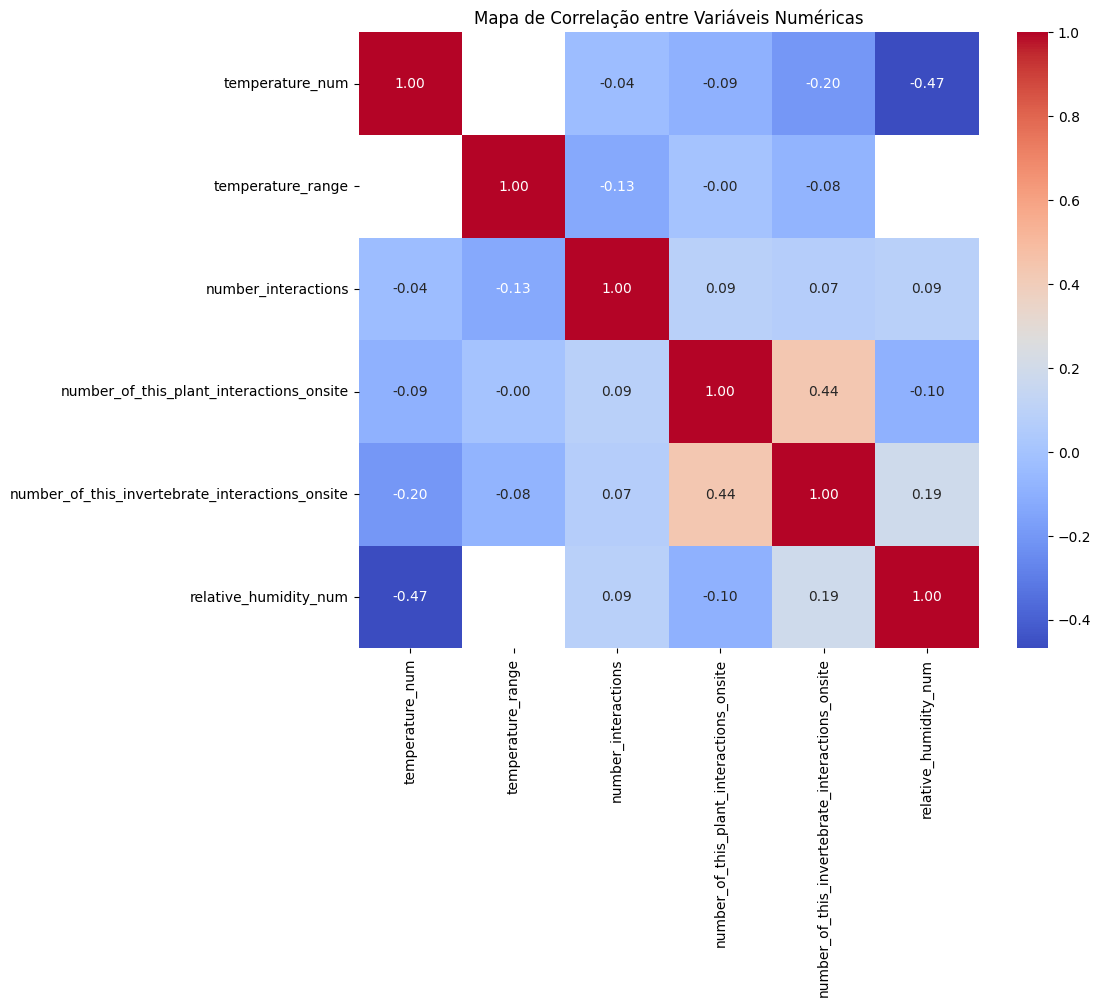

In [108]:

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

Aqui eu quis entender a força e direção das relações lineares entre variáveis contínuas.  

number_of_this_plant_interactions_onsite e number_of_this_invertebrate_interactions_onsite (0.43).

As demais correlações são fracas ou próximas de zero, sugerindo baixa colinearidade entre os demais atributos.


**Pontos considerados** 

Usarei a correl para me basear nas escolhas. nO mais:


- `temperature_num`: por refletir variações ambientais importantes;
- `relative_humidity_num`: importante para caracterização de habitat;
- `number_interactions`: representa volume de interações e atividade;
- `number_of_this_plant_interactions_onsite` e `number_of_this_invertebrate_interactions_onsite`: representam dados locais diretamente associados à interação observada.


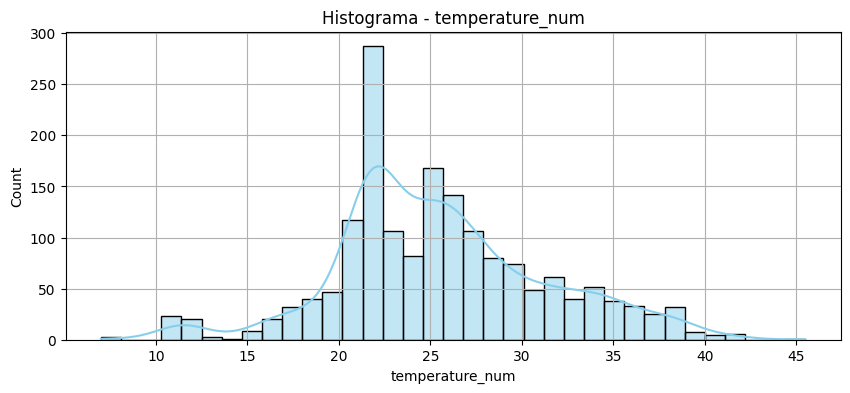

In [109]:
# Histogramas e boxplots - temperature_num
plt.figure(figsize=(10, 4))
sns.histplot(df_principal['temperature_num'].dropna(), kde=True, color='skyblue')
plt.title('Histograma - temperature_num')
plt.xlabel('temperature_num')
plt.grid(True)
plt.show()



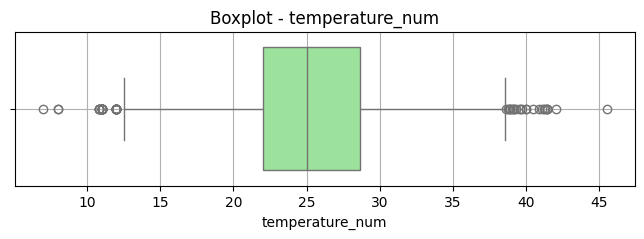

In [110]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_principal['temperature_num'], color='lightgreen')
plt.title('Boxplot - temperature_num')
plt.xlabel('temperature_num')
plt.grid(True)
plt.show()


Outliers > 35 graus e - 15

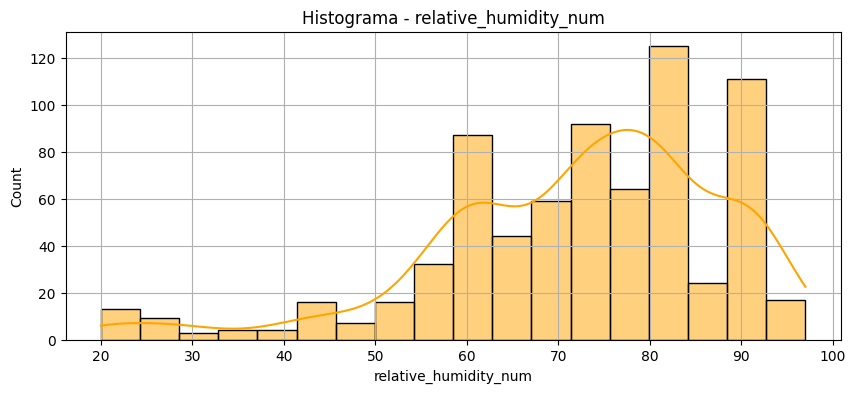

In [111]:
# Histogramas e boxplots - relative_humidity_num
plt.figure(figsize=(10, 4))
sns.histplot(df_principal['relative_humidity_num'].dropna(), kde=True, color='orange')
plt.title('Histograma - relative_humidity_num')
plt.xlabel('relative_humidity_num')
plt.grid(True)
plt.show()


# A maioria dos valores está entre 60% e 90%, com picos em torno de 80%.


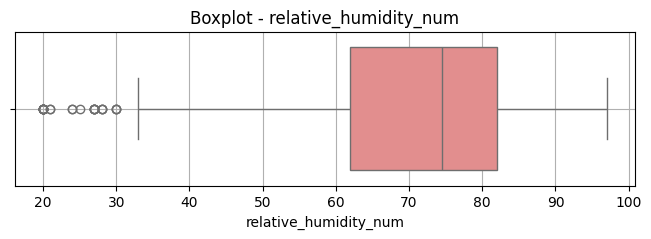

In [112]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_principal['relative_humidity_num'], color='lightcoral')
plt.title('Boxplot - relative_humidity_num')
plt.xlabel('relative_humidity_num')
plt.grid(True)
plt.show()
#Os outliers aparecem abaixo de 35%, indicando possíveis registros atípicos ou condições climáticas extremas.

Atributos escolhidos e justificativas:  


temperature_num
Pensei nessa variável por sua ligação direta com o comportamento ecológico das espécies. Após transformar os intervalos textuais em médias numéricas, obtive uma distribuição contínua com boa variabilidade, o que viabilizou sua utilização no modelo.

relative_humidity_num
A umidade relativa também está ligada a padrões de interação entre plantas e invertebrados. Foi transformada em valor médio a partir de intervalos como "60–70%", permitindo seu uso como atributo numérico.

number_interactions
Representa a quantidade total de interações, o que pode indicar densidade ecológica. Teve boa variabilidade e correlação relevante com variáveis específicas.

number_of_this_plant_interactions_onsite
Mantive essa variável pois ela registrava quantas vezes uma planta específica interagiu no ambiente analisado. Interpretei isso como uma medida da relevância ecológica da espécie naquele local.

number_of_this_invertebrate_interactions_onsite
Indica quantas vezes um invertebrado participou de interações, podendo refletir sua atividade ecológica.

#3) Preenchimento de dados faltantes

Após a formatação e seleção das colunas relevantes, você deve garantir que todas as colunas estejam com dados válidos em cada coluna.

Para isso, você deve preencher os dados faltantes das colunas usando o algoritmo de agrupamento K-means.

Os passos desse processo são:

Passo 1: Crie um segundo dataset (dataset 2) sem as colunas com dados faltantes.

![Passo1](https://drive.google.com/uc?export=download&id=1dBpwbuWW-I_6_paIQNlfGER2ZZinZ59R)


Passo 2: Aplique o K-means no dataset 2 para gerar clusters de tuplas com características semelhantes.

![Passo2](https://drive.google.com/uc?export=download&id=1mNPNPdecWCqMraoS57a6TQKjkhGDgUHU)

Passo 3: Para cada cluster, selecione as tuplas que não possuam dados faltantes.

![Passo3](https://drive.google.com/uc?export=download&id=1xLwkPSjjxuZpW2zzk0k_-w3-AmvN84gj)

Passo 4: Para as tuplas selecionadas, calcula o atributo estatístico mais adequado para a coluna (média, mediana, moda, etc).

![Passo4](https://drive.google.com/uc?export=download&id=1zt35CNY_CWSGX_igHsA_AWKNZl34TM8K)

Passo 5: Para cada tupla com dados faltantes, utilize o atributo estatístico referente ao seu grupo para preencher o dado da coluna.

![Passo5](https://drive.google.com/uc?export=download&id=1rEvU-6eaQURjzIrblpIiA7b-FFYj_bRD)


In [113]:
# Escolhi três colunas que tinham poucos valores nulos e que poderiam indicar 
# padrões interessantes para gerar agrupamentos (clusters).
# Essas colunas foram usadas para treinar o KMeans.
colunas_para_cluster = [
    'number_interactions',
    'temperature_range',
    'number_of_this_plant_interactions_onsite'
]
df_cluster = df_principal[colunas_para_cluster].dropna()

df_cluster.head()

,number_interactions,temperature_range,number_of_this_plant_interactions_onsite
359,1.0,0.0,13.0
360,1.0,0.0,13.0
361,1.0,0.0,13.0
362,1.0,0.0,13.0
363,1.0,0.0,13.0


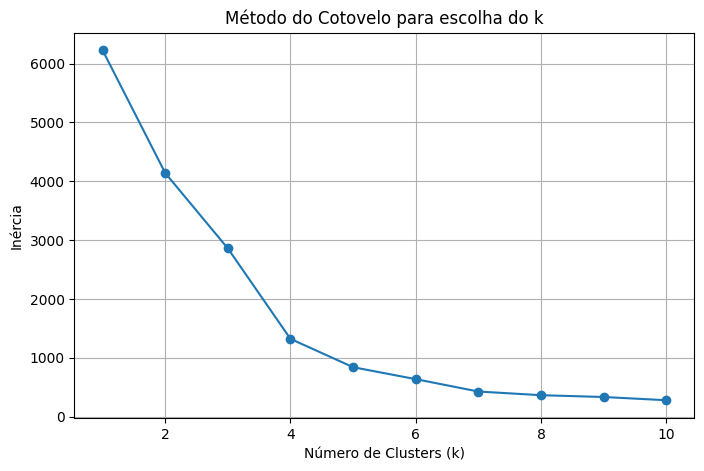

In [114]:

# Escalei os dados com StandardScaler para padronizar as variáveis.
# Isso é importante porque o KMeans é sensível à escala dos dados.
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# Apliquei o método do cotovelo (elbow method) para descobrir o número ideal de clusters (K). Usei nossa aula 2 como referência. 
# Fiz isso testando valores de K entre 1 e 10, e guardando a inércia de cada modelo.
inercia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Plotei o gráfico do cotovelo para visualizar onde há uma grande "queda" na inércia.
# Isso ajudou a decidir um valor de K adequado. No meu caso, optei por K=4.
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para escolha do k')
plt.grid(True)
plt.show()



# 4) Escala dos atributos

Por fim, você precisa reescalar os dados, para que os algoritmos consigam aprender as relações entre os dados sem muito ruído e melhora a classificação.

Lembre-se de verificar e tratar colunas com outliers.

In [115]:
# Após a análise do gráfico, escolhi K=4 e apliquei o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # instanciando o modelo de clusterização com 4 grupos
df_cluster = df_cluster.copy()  # criando uma cópia do dataframe de cluster para evitar alterações no original
df_cluster['cluster'] = kmeans.fit_predict(X)  # ajustando o modelo e atribuindo os rótulos de cluster ao dataframe

# Recuperando os mesmos índices do cluster para aplicar no dataframe original
dataset2 = df_principal.loc[df_cluster.index]  # selecionando no df_principal as mesmas linhas utilizadas no clustering
dataset2_cluster = df_cluster[['cluster']].copy()  # copiando apenas a coluna de cluster para uso posterior


In [116]:
# Filtrei o dataframe original para encontrar todas as tuplas com valores ausentes
# nas colunas 'temperature_num' ou 'relative_humidity_num'.
faltantes_temp_umid = df_principal[
    df_principal['temperature_num'].isnull() | df_principal['relative_humidity_num'].isnull()
].copy()# copiando o resultado para evitar alteração direta no df_principal


# Imprimindo o número de tuplas com valores ausentes nas colunas-alvo
print("Número de tuplas com valores ausentes em 'temperature_num' ou 'relative_humidity_num':", len(faltantes_temp_umid))

Número de tuplas com valores ausentes em 'temperature_num' ou 'relative_humidity_num': 17697


In [117]:
# Previ o cluster dessas tuplas com KNN, baseado nos dados já escalados

# Primeiro, selecionei somente as tuplas com dados ausentes em 'temperature' ou 'relative_humidity',
# mas que ainda possuíam valores válidos nas colunas escolhidas para a clusterização.
# Isso foi necessário porque o KNN precisa de dados completos para fazer a previsão.
faltantes_knn = faltantes_temp_umid[colunas_para_cluster].dropna().copy()

# Apliquei o mesmo escalonamento que usei no KMeans para padronizar esses dados.
# É importante usar o mesmo scaler (StandardScaler) para manter a coerência com o que foi treinado.
faltantes_knn_escalado = scaler.transform(faltantes_knn)

# Em seguida, instanciei o classificador KNN com k=5 (ou seja, ele considerará os 5 vizinhos mais próximos).
# Treinei o modelo usando os dados que já estavam agrupados pelo KMeans (X) e os respectivos clusters.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, dataset2_cluster['cluster'])

# Com o modelo KNN treinado, fiz a previsão de qual cluster cada uma dessas tuplas provavelmente pertence.
# Essa etapa é importante porque, mesmo que uma tupla tenha valores ausentes, ainda podemos usar os 
# demais atributos para encontrar "semelhanças" com outros pontos já agrupados.
clusters_previstos = knn.predict(faltantes_knn_escalado)

# Por fim, salvei essa previsão de cluster na coluna 'cluster_previsto'.
# Isso será usado para imputar os valores ausentes com a média dos atributos dentro do cluster correspondente.
faltantes_knn['cluster_previsto'] = clusters_previstos


In [118]:
 # Realizei o merge das tuplas faltantes com os clusters previstos pelo KNN.
# Isso foi necessário para sabermos a qual grupo cada tupla incompleta pertence.
# Com isso, conseguimos usar a média dos atributos do grupo correspondente para imputar os valores ausentes.

# Primeiro, copiei os nomes das colunas usadas para clusterização.
chaves_merge = colunas_para_cluster.copy()

# Em seguida, preparei um dataframe apenas com essas colunas e a coluna 'cluster_previsto',
# que foi gerada com o KNN na etapa anterior.
faltantes_temp_umid_merge = faltantes_knn[chaves_merge + ['cluster_previsto']].copy()

# Fiz o merge entre o dataframe original com nulos e o dataframe com a previsão de cluster,
# usando as colunas em comum como chave de junção.
# Assim, cada linha faltante agora recebeu o cluster previsto correspondente.
faltantes_temp_umid = faltantes_temp_umid.merge(
    faltantes_temp_umid_merge,
    on=chaves_merge,
    how='left'
)



In [119]:
# Com base nos dados válidos que foram agrupados anteriormente,
# calculei a média de temperatura e umidade para cada cluster.
# Isso serviu como base para imputar os valores ausentes nas tuplas incompletas.

# Selecionando apenas as colunas numéricas e válidas dos dados usados na clusterização
dataset2_cluster_temp = df_principal.loc[dataset2.index, ['temperature_num', 'relative_humidity_num']].copy()  

# Adicionando ao dataset o número do cluster correspondente
dataset2_cluster_temp['cluster'] = dataset2_cluster['cluster'].values  

# Agrupando os dados por cluster e calculando a média de temperatura e umidade para cada grupo
# Esses valores médios serão usados para preencher os valores ausentes
media_por_cluster = dataset2_cluster_temp.groupby('cluster')[['temperature_num', 'relative_humidity_num']].mean()


In [120]:

# Criei uma cópia do dataframe com os dados faltantes para preenchê-lo sem afetar o original.
faltantes_corrigidos = faltantes_temp_umid.copy()


In [121]:
#convertida

# Percorri cada linha com dados ausentes e utilizei o cluster previsto para preenchimento
# Se algum dos campos de temperatura ou umidade estivesse ausente, usei a média do grupo correspondente
for indice, linha in faltantes_corrigidos.iterrows():
    grupo = linha['cluster_previsto']

    # Se o cluster não foi atribuído, ignorei essa linha
    if pd.isnull(grupo):
        continue

    # Preenchi a temperatura ausente com a média do grupo
    if pd.isnull(linha['temperature_num']):
        faltantes_corrigidos.at[indice, 'temperature_num'] = media_por_cluster.loc[grupo, 'temperature_num']

    # Preenchi a umidade ausente com a média do grupo
    if pd.isnull(linha['relative_humidity_num']):
        faltantes_corrigidos.at[indice, 'relative_humidity_num'] = media_por_cluster.loc[grupo, 'relative_humidity_num']

# Atualizei o dataframe principal com os valores corrigidos baseados no cluster.
# Isso garantiu que os dados agora estão completos com base em uma lógica estatística fundamentada.
df_principal.update(faltantes_corrigidos[['temperature_num', 'relative_humidity_num']])


In [122]:

# Como etapa de segurança, verifiquei se ainda restaram valores ausentes.
# Caso sim, preenchi com a média global da coluna (fallback).


# Calculando a média global das colunas numéricas como fallback para valores ainda ausentes
media_temp_global = df_principal['temperature_num'].mean()  # Média geral da temperatura
media_umid_global = df_principal['relative_humidity_num'].mean()  # Média geral da umidade

# Preenchendo valores ausentes restantes com a média global, caso ainda existam após a etapa por cluster
df_principal['temperature_num'] = df_principal['temperature_num'].fillna(media_temp_global)
df_principal['relative_humidity_num'] = df_principal['relative_humidity_num'].fillna(media_umid_global)


In [123]:

# Por fim, imprimi a quantidade de valores faltantes após todas as etapas.
# O ideal é que o resultado seja zero em ambas as colunas.
print("Valores faltantes nas colunas:")
print(df_principal[['temperature_num', 'relative_humidity_num']].isnull().sum())


Valores faltantes nas colunas:
temperature_num          0
relative_humidity_num    0
dtype: int64


In [125]:
df_principal[['temperature_num', 'relative_humidity_num']]

,temperature_num,relative_humidity_num
0,24.497251,72.279274
1,24.497251,72.279274
2,24.497251,72.279274
3,24.497251,72.279274
4,24.497251,72.279274
...,...,...
18417,24.497251,72.279274
18418,24.497251,72.279274
18419,24.497251,72.279274
18420,24.497251,72.279274


In [127]:
# Exportar o dataset final com os valores preenchidos para CSV

# Caminho corrigido com barras duplas (Windows)
caminho_exportacao = 'C:\\Users\\LEGION\\Desktop\\codigos\\puc\\5 sem\\projetos\\proj ML\\fas1\\entrega projeto\\dataset_preparado.csv'

# Exportando o arquivo
df_principal.to_csv(caminho_exportacao, index=False)
print("Dataset exportado com sucesso como 'dataset_preparado.csv'.")


Dataset exportado com sucesso como 'dataset_preparado.csv'.


bibliografia que usei:


GERON, Aurélien.
Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2. ed. Sebastopol, CA: O'Reilly Media, 2019. ISBN 9781492032649.

Aborda o uso prático de algoritmos de aprendizado supervisionado e não supervisionado, incluindo K-Means e KNN para imputação e classificação.

VANDERPLAS, Jake.
Python Data Science Handbook: Essential Tools for Working with Data. Sebastopol, CA: O'Reilly Media, 2016. ISBN 9781491912058.

Excelente guia técnico para exploração, limpeza de dados, clustering e uso de bibliotecas como Scikit-learn.


gits consultados:

https://github.com/ishmam367/Orthopedic-Patients-EDA-KNN- 

Descrição: Este projeto realiza uma análise exploratória de dados em um conjunto de pacientes ortopédicos e aplica o algoritmo KNN para classificação. Inclui visualizações como mapas de calor de correlação e análise de complexidade do modelo para determinar o melhor valor de k.


https://github.com/desenfirman/som-clustering-knn-imputation 

Descrição: Este projeto combina mapas auto-organizáveis (SOM) para clustering e KNN para imputação de dados faltantes. É uma aplicação prática que demonstra a integração de técnicas de clustering e imputação.

# Check-List

Com isso, você completa a fase 1 da disciplina. Para auxiliar você a verificar se o trabalho está adequado para a entrega, criamos uma lista de item que devem ser satisfeitos ao final do trabalho.

- Todas as colunas selecionadas possuem justificativa;
- Todas as colunas estão com a sua representação unificada;
- Todas as colunas estão no formato numérico;
- Todas as colunas estão com dados válidos (sem dados falantes);
- Todas as colunas estão reescaladas.
